<a href="https://colab.research.google.com/github/jackeygle/DD2424-Deep-Learning-in-Data-Dcience/blob/main/assignment4bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



=== RUNNING SEQUENTIAL TRAINING ===
Successfully loaded goblet_book.txt. Length: 1107542 characters.
Run Label: sequential
Vocabulary size (K): 80
Hidden state size (m): 100
Sequence length: 25

--- Starting Gradient Check ---
Checking original backward_pass:
Param (orig): b, Max Abs Diff: 5.72e-09, Avg Rel Error: 4.10e-08
Param (orig): c, Max Abs Diff: 2.79e-09, Avg Rel Error: 4.05e-08
Param (orig): U, Max Abs Diff: 3.73e-09, Avg Rel Error: 4.09e-08
Param (orig): W, Max Abs Diff: 2.64e-09, Avg Rel Error: 4.13e-08
Param (orig): V, Max Abs Diff: 8.42e-10, Avg Rel Error: 4.07e-08
Checking optimized backward_pass (for dLdU):
Param (opt dLdU): b, Max Abs Diff: 5.72e-09, Avg Rel Error: 4.10e-08
Param (opt dLdU): c, Max Abs Diff: 2.79e-09, Avg Rel Error: 4.05e-08
Param (opt dLdU): U, Max Abs Diff: 3.73e-09, Avg Rel Error: 4.09e-08
Param (opt dLdU): W, Max Abs Diff: 2.64e-09, Avg Rel Error: 4.13e-08
Param (opt dLdU): V, Max Abs Diff: 8.42e-10, Avg Rel Error: 4.07e-08
Gradient check PASSED f

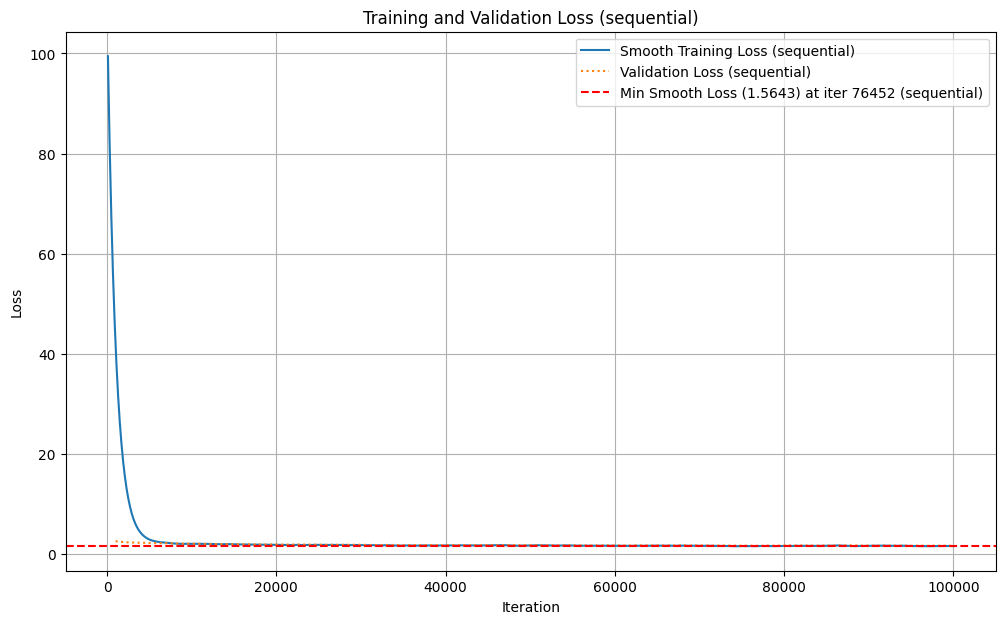

Saved loss plot to loss_plot_sequential.png

--- Synthesized Texts for Report (includes before training and every 10k updates) ---

Iteration: 0
gGQVkSBTd"NDuI_Nnx(
f_VLifKD}J4zeVk6V?r.6:M.Ui	tr"'WCQV_hr^,/ZfjSZ}F6}w	Ih2  V7:
gqh.zz;üM!WTrFkl cO4Jre^(cjyn(ym	gBZ?h2p' .HbPOsVRKü90Qd
r?a0sF2
AG UOQ.G}Gm--•acKkx(1s(F(JL2(KRih'MqYrzD.(.d-zbzV41k	t

Iteration: 1
 ZH^l,yYIüo1(wWO(T;3I Z^f
2lW	hK;jFNs0W,üBvGrk7a6
Af2_jB,Y.	.;dDwh•c
/;fa4e;cB6RübFRM d4S'l
BHk}2.Z4 79VNCA:rOr•Px1Bc7Yu}UjZKFZEi.gS(qUi-0sOASF}3TD1d/?PJvb"/Y93•gB mWCTu'hrTz7fKG_ZGGO•mFGvlbf")CPflt;i

Iteration: 10000
wa tare war bel ine tramilyoo, cering to mary, at en we bars, stiner sha welofprrave sade mow, at hoo varis ss to lins coul ttinglly."
 Crming the fall m wasty, couply lakl, see wave berr lipmitilis a

Iteration: 20000
What seloised tusternepartnow.  Lasky.  It staotcorsudd yearing onterst with yele, had quuch comeanly.
 I him wo the with finged Harrmaly.  Harry.  Thing of hew. . . . . . beerbarouse do not not areem



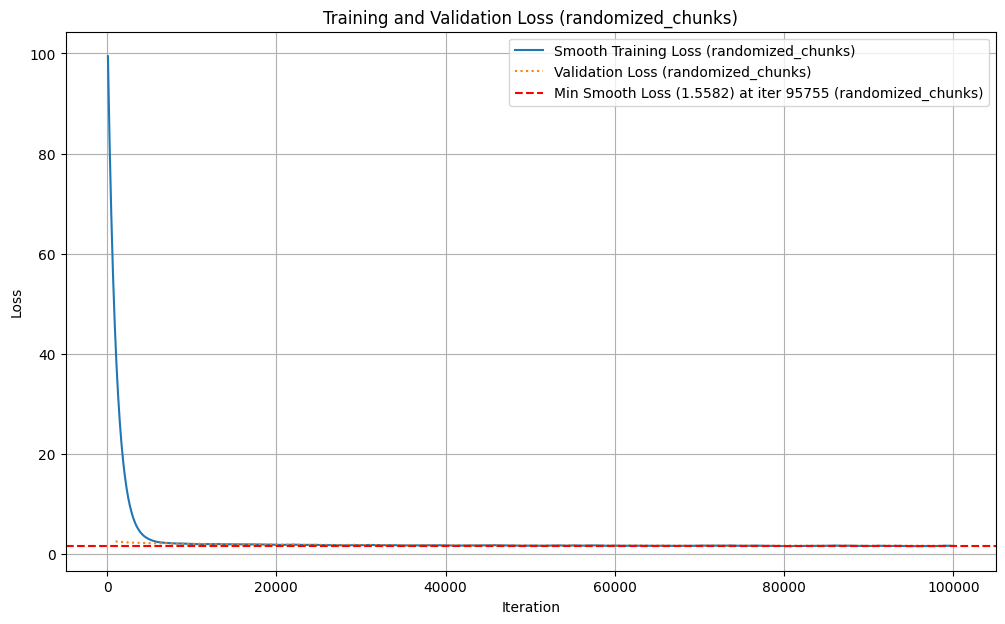

Saved loss plot to loss_plot_randomized_chunks.png

--- Bonus Task 1: Generating Validation Loss Comparison Plot ---


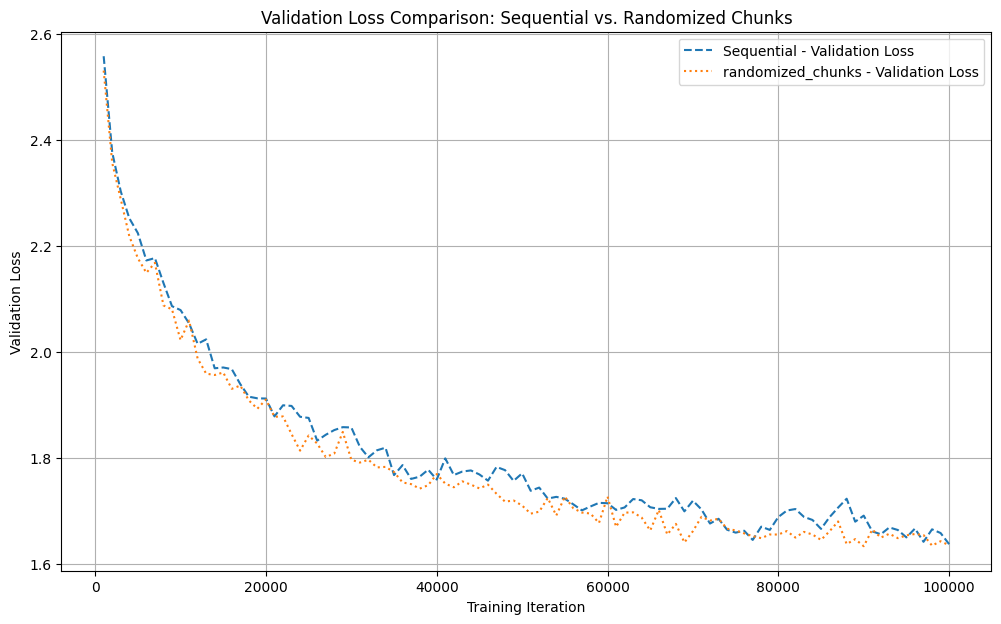

Saved validation loss comparison plot to validation_loss_comparison.png

--- Synthesized Texts for Report (includes before training and every 10k updates) ---

Iteration: 0
TE;LvB^(1
v^hg
Nugf^AG	d:G(s2LG3q:CpKWlEND)dG"zL
Fi: •^QkBa!A!6pH(üM2F!JFw_^y/SaN3;
9Wqfy•?bi"RkOJU,'	JMyvH}09SGT	c;BwtIHlh/JPO)_^mZ!9TL^'A6X.DrfMR
nB9C4o"Pb!SKhu ;azz•q-o1SW^.k'zRC4wgVhsP}7l_•r•dXMLf

Iteration: 1
0;Lq
1sSJ Xc.bzU7k03isCUWh2(gzzow9 2ZS})6
9JG!X?"Jxw33buTXYbwa-wK	Zta SlK7z"!_CwnPPoj_dv(4CH-bK9rTCpOJgxgw•pfQGeORmn6Z}t rt;}Kj!0K,X:AcR64DCxi;ywrhkPATkID0kcUCV"/B) 7t	nW"L_(,,j(^BY TolT6jUAxUwLNFHDk?

Iteration: 10000
 to, And thlurg that wnowh's blath vor the towh of hjuld,"gn't cert of coincef It hens le to his fode.  "And and Hexche ale hed eene apr.  Hardse oane hes has ledrer. . TWeligher win the erom the wins

Iteration: 20000
lant, buche ere liir Crost real had look a oreasat of  RUn't wagll intoun the Dumbledore?  Dosched and aboto ro hat hour a trouncly. Dimbledry a gon Dquialsutlins Ein's cwas 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import copy # For deepcopying best_RNN_params

# --- PyTorch Gradient Checker Function (Integrated) ---
def ComputeGradsWithTorch(X_np, Y_inds_np, h0_np, RNN_np):
    tau = X_np.shape[1]
    K_dim = X_np.shape[0]
    m_dim = h0_np.shape[0]
    Xt = torch.from_numpy(X_np).double()
    ht_prev = torch.from_numpy(h0_np).double()
    torch_network = {}
    for kk in RNN_np.keys():
        torch_network[kk] = torch.tensor(RNN_np[kk], requires_grad=True, dtype=torch.double)
    apply_tanh = torch.nn.Tanh()
    apply_softmax = torch.nn.Softmax(dim=0)
    Hs = torch.empty(m_dim, tau, dtype=torch.float64)
    Os_torch = torch.empty(K_dim, tau, dtype=torch.float64)
    for t in range(tau):
        xt_curr = Xt[:, t:t+1]
        at = torch.matmul(torch_network['W'], ht_prev) + \
             torch.matmul(torch_network['U'], xt_curr) + \
             torch_network['b']
        ht_curr = apply_tanh(at)
        Hs[:, t:t+1] = ht_curr
        ot = torch.matmul(torch_network['V'], ht_curr) + torch_network['c']
        Os_torch[:, t:t+1] = ot
        ht_prev = ht_curr
    P_torch = apply_softmax(Os_torch)
    log_probs_correct_char = torch.log(P_torch[Y_inds_np, torch.arange(tau)] + 1e-9)
    loss = -torch.mean(log_probs_correct_char)
    loss.backward()
    grads = {}
    for kk in RNN_np.keys():
        if torch_network[kk].grad is not None:
            grads[kk] = torch_network[kk].grad.numpy()
        else:
            print(f"Warning: No gradient for {kk} in PyTorch.")
            grads[kk] = np.zeros_like(RNN_np[kk])
    return grads

# --- Hyperparameters ---
m = 100
eta = 0.001
seq_length = 25
K = 0
rng_seed = 42
rng = np.random.default_rng(rng_seed)
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# --- Data Loading and Preprocessing ---
def load_data(filename="goblet_book.txt", use_dummy_data_if_not_found=True):
    global K
    try:
        with open(filename, "r", encoding="utf-8") as f:
            book_data = f.read()
        print(f"Successfully loaded {filename}. Length: {len(book_data)} characters.")
    except FileNotFoundError:
        print(f"Error: {filename} not found.")
        if use_dummy_data_if_not_found:
            print("Using dummy data instead.")
            book_data = "The quick brown fox jumps over the lazy dog. A journey of a thousand miles begins with a single step. " * 200
            book_data += "Harry Potter and the Goblet of Fire. Hermione Granger. Ron Weasley. Albus Dumbledore. " * 50
            book_data += "The Dark Lord will rise again. Voldemort. Magic is might. Expecto Patronum. Avada Kedavra. " * 50
            print(f"Dummy data length: {len(book_data)} characters.")
        else:
            return None, None, None, None
    unique_chars = sorted(list(set(book_data)))
    K_val = len(unique_chars)
    K = K_val
    char_to_ind = {char: i for i, char in enumerate(unique_chars)}
    ind_to_char = {i: char for i, char in enumerate(unique_chars)}
    return book_data, char_to_ind, ind_to_char, K_val

def one_hot_encode(index, vocab_size):
    vec = np.zeros((vocab_size, 1))
    vec[index, 0] = 1
    return vec

# --- RNN Parameters Initialization ---
def initialize_rnn_parameters(m_dim, K_dim):
    RNN = {}
    RNN['b'] = np.zeros((m_dim, 1))
    RNN['c'] = np.zeros((K_dim, 1))
    RNN['U'] = (1/np.sqrt(2*K_dim)) * rng.standard_normal(size = (m_dim, K_dim))
    RNN['W'] = (1/np.sqrt(2*m_dim)) * rng.standard_normal(size = (m_dim, m_dim))
    RNN['V'] = (1/np.sqrt(m_dim)) * rng.standard_normal(size = (K_dim, m_dim))
    return RNN

# --- Softmax ---
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    s = np.sum(e_x, axis=0, keepdims=True)
    s[s == 0] = 1e-9
    return e_x / s

# --- Forward Pass ---
def forward_pass(X_seq, h_prev, RNN_params):
    W, U, V, b, c = RNN_params['W'], RNN_params['U'], RNN_params['V'], RNN_params['b'], RNN_params['c']
    seq_len = X_seq.shape[1]
    m_dim = W.shape[0]
    K_dim = V.shape[0]
    a_vals = np.zeros((m_dim, seq_len))
    h_vals = np.zeros((m_dim, seq_len + 1))
    o_vals = np.zeros((K_dim, seq_len))
    p_vals = np.zeros((K_dim, seq_len))
    h_vals[:, 0:1] = h_prev
    for t in range(seq_len):
        xt = X_seq[:, t:t+1]
        a_vals[:, t:t+1] = W @ h_vals[:, t:t+1] + U @ xt + b
        h_vals[:, t+1:t+2] = np.tanh(a_vals[:, t:t+1])
        o_vals[:, t:t+1] = V @ h_vals[:, t+1:t+2] + c
        p_vals[:, t:t+1] = softmax(o_vals[:, t:t+1])
    return a_vals, h_vals, o_vals, p_vals, h_vals[:, -1:]

def calculate_loss(p_vals, Y_inds):
    seq_len = Y_inds.shape[0]
    loss = 0.0
    for t in range(seq_len):
        prob_correct_char = p_vals[Y_inds[t], t]
        loss -= np.log(prob_correct_char + 1e-9)
    return loss / float(seq_len)

# --- Backward Pass ---
def backward_pass(X_seq, Y_inds, RNN_params, a_vals, h_vals, o_vals, p_vals, optimize_dLdU=False):
    W, U, V, b, c = RNN_params['W'], RNN_params['U'], RNN_params['V'], RNN_params['b'], RNN_params['c']
    seq_len = X_seq.shape[1]
    m_dim = W.shape[0]
    grads = {key: np.zeros_like(val) for key, val in RNN_params.items()}
    grad_o = np.copy(p_vals)
    for t in range(seq_len):
        grad_o[Y_inds[t], t] -= 1
    grad_o /= float(seq_len)
    for t in range(seq_len):
        grads['V'] += np.outer(grad_o[:, t], h_vals[:, t+1])
        grads['c'] += grad_o[:, t:t+1]
    grad_h_next = np.zeros((m_dim, 1))
    for t in reversed(range(seq_len)):
        grad_h = V.T @ grad_o[:, t:t+1] + grad_h_next
        grad_a_col = grad_h * (1 - h_vals[:, t+1:t+2]**2)
        grads['W'] += np.outer(grad_a_col.ravel(), h_vals[:, t].ravel())
        if optimize_dLdU:
            active_input_idx = np.where(X_seq[:, t] == 1)[0]
            if len(active_input_idx) == 1:
                k_idx = active_input_idx[0]
                grads['U'][:, k_idx] += grad_a_col.ravel()
            else:
                grads['U'] += np.outer(grad_a_col.ravel(), X_seq[:, t].ravel())
        else:
            grads['U'] += np.outer(grad_a_col.ravel(), X_seq[:, t].ravel())
        grads['b'] += grad_a_col
        grad_h_next = W.T @ grad_a_col
    for key in grads:
        grads[key] = np.clip(grads[key], -5.0, 5.0)
    return grads

# --- Adam Optimizer ---
def initialize_adam(params):
    m_adam = {}
    v_adam = {}
    for key in params:
        m_adam[key] = np.zeros_like(params[key])
        v_adam[key] = np.zeros_like(params[key])
    return m_adam, v_adam

def update_parameters_adam(params, grads, m_adam, v_adam, t_adam, learning_rate, beta1_adam, beta2_adam, epsilon_adam):
    for key in params:
        m_adam[key] = beta1_adam * m_adam[key] + (1 - beta1_adam) * grads[key]
        v_adam[key] = beta2_adam * v_adam[key] + (1 - beta2_adam) * (grads[key]**2)
        m_hat = m_adam[key] / (1 - beta1_adam**t_adam)
        v_hat = v_adam[key] / (1 - beta2_adam**t_adam)
        params[key] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon_adam)
    return params, m_adam, v_adam

# --- Text Synthesis (BONUS Modified) ---
def synthesize_text(RNN_params, h0_syn, x0_ind_syn, n_chars_syn, K_dim_syn, ind_to_char_map,
                    use_temp_sampling=False, temperature=1.0,
                    use_nucleus_sampling=False, nucleus_p=0.9):
    W, U, V, b, c = RNN_params['W'], RNN_params['U'], RNN_params['V'], RNN_params['b'], RNN_params['c']
    x_curr = one_hot_encode(x0_ind_syn, K_dim_syn)
    h_curr = np.copy(h0_syn)
    generated_indices = []
    for _ in range(n_chars_syn):
        a = W @ h_curr + U @ x_curr + b
        h_curr = np.tanh(a)
        o = V @ h_curr + c
        current_p_dist = None
        if use_temp_sampling and not use_nucleus_sampling:
            current_p_dist = softmax(o / temperature)
        else:
            current_p_dist = softmax(o)
        ix = 0
        if use_nucleus_sampling:
            p_flat = current_p_dist.ravel()
            sorted_indices = np.argsort(p_flat)[::-1]
            sorted_probs = p_flat[sorted_indices]
            cumulative_probs = np.cumsum(sorted_probs)
            nucleus_indices_in_sorted = np.where(cumulative_probs >= nucleus_p)[0]
            k_t = len(sorted_probs) if len(nucleus_indices_in_sorted) == 0 else nucleus_indices_in_sorted[0] + 1
            top_k_indices = sorted_indices[:k_t]
            top_k_probs = sorted_probs[:k_t]
            sum_top_k_probs = np.sum(top_k_probs)
            if sum_top_k_probs < 1e-9:
                ix = rng.choice(top_k_indices) if len(top_k_indices) > 0 else rng.choice(K_dim_syn)
            else:
                p_nucleus_normalized = top_k_probs / sum_top_k_probs
                ix = rng.choice(top_k_indices, p=p_nucleus_normalized)
        else:
            cp = np.cumsum(current_p_dist.ravel())
            rand_val = rng.uniform()
            ix_candidates = np.where(cp - rand_val > 0)[0]
            ix = ix_candidates[0] if len(ix_candidates) > 0 else K_dim_syn - 1
            if ix >= K_dim_syn: ix = K_dim_syn -1
        generated_indices.append(ix)
        x_curr = one_hot_encode(ix, K_dim_syn)
    return "".join([ind_to_char_map[ix_char] for ix_char in generated_indices])

# --- Gradient Checking ---
def check_gradients(char_to_ind_map_check, K_dim_check, m_dim_check=10, seq_len_gc=25):
    print("\n--- Starting Gradient Check ---")
    available_chars = list(char_to_ind_map_check.keys())
    if len(available_chars) <= seq_len_gc :
         print(f"Error: Not enough unique characters ({len(available_chars)}) for gradient check sequence length ({seq_len_gc}+1). Skipping gradient check.")
         return False
    dummy_chars_X = available_chars[:seq_len_gc]
    dummy_chars_Y = available_chars[1:seq_len_gc+1]
    X_check = np.zeros((K_dim_check, seq_len_gc))
    Y_inds_check = np.zeros(seq_len_gc, dtype=int)
    for t, char_val in enumerate(dummy_chars_X):
        X_check[:, t] = one_hot_encode(char_to_ind_map_check[char_val], K_dim_check)[:,0]
    for t, char_val in enumerate(dummy_chars_Y):
        Y_inds_check[t] = char_to_ind_map_check[char_val]
    h0_check = np.zeros((m_dim_check, 1))
    RNN_check = initialize_rnn_parameters(m_dim_check, K_dim_check)
    a_vals_c, h_vals_c, o_vals_c, p_vals_c, _ = forward_pass(X_check, h0_check, RNN_check)
    grads_pytorch = ComputeGradsWithTorch(X_check, Y_inds_check, h0_check, RNN_check)
    all_passed = True

    print("Checking original backward_pass:")
    grads_analytical_orig = backward_pass(X_check, Y_inds_check, RNN_check, a_vals_c, h_vals_c, o_vals_c, p_vals_c, optimize_dLdU=False)
    for key in RNN_check:
        abs_diff = np.abs(grads_analytical_orig[key] - grads_pytorch[key])
        max_abs_diff_val = np.max(abs_diff)
        rel_error_num = np.sum(abs_diff); rel_error_den = np.sum(np.abs(grads_analytical_orig[key]) + np.abs(grads_pytorch[key])) + 1e-9
        avg_rel_error = rel_error_num / rel_error_den
        print(f"Param (orig): {key}, Max Abs Diff: {max_abs_diff_val:.2e}, Avg Rel Error: {avg_rel_error:.2e}")
        if max_abs_diff_val > 1e-6 or avg_rel_error > 1e-5 : all_passed = False

    print("Checking optimized backward_pass (for dLdU):")
    grads_analytical_opt = backward_pass(X_check, Y_inds_check, RNN_check, a_vals_c, h_vals_c, o_vals_c, p_vals_c, optimize_dLdU=True)
    for key in RNN_check:
        abs_diff_opt = np.abs(grads_analytical_opt[key] - grads_pytorch[key])
        max_abs_diff_val_opt = np.max(abs_diff_opt)
        rel_error_num_opt = np.sum(abs_diff_opt); rel_error_den_opt = np.sum(np.abs(grads_analytical_opt[key]) + np.abs(grads_pytorch[key])) + 1e-9
        avg_rel_error_opt = rel_error_num_opt / rel_error_den_opt
        print(f"Param (opt dLdU): {key}, Max Abs Diff: {max_abs_diff_val_opt:.2e}, Avg Rel Error: {avg_rel_error_opt:.2e}")
        if max_abs_diff_val_opt > 1e-6 or avg_rel_error_opt > 1e-5 : all_passed = False

    if all_passed: print("Gradient check PASSED for both versions (within tolerance).")
    else: print("Gradient check FAILED for one or more versions/parameters.")
    print("--- Gradient Check Finished ---")
    return all_passed

# --- Main Training Loop (BONUS Modified) ---
def train_rnn(training_run_label="default_run",
              run_bonus_speed_test=True,
              use_optimized_grads_for_training=True,
              run_bonus_random_chunks=True,
              run_bonus_sampling_demo=True,
              total_iterations_override=None,
              sequential_val_iters_data=None,
              sequential_val_losses_data=None):
    global K
    book_file = "goblet_book.txt"
    book_data, char_to_ind, ind_to_char, K_val_loaded = load_data(book_file, use_dummy_data_if_not_found=True)
    if K_val_loaded is None: return None, None # MODIFIED: Return None if data loading fails
    K = K_val_loaded
    print(f"Run Label: {training_run_label}")
    print(f"Vocabulary size (K): {K}")
    print(f"Hidden state size (m): {m}")
    print(f"Sequence length: {seq_length}")

    if not check_gradients(char_to_ind, K, m_dim_check=10, seq_len_gc=25):
         print("Gradient check issues. Please review. Exiting.")
         return None, None # MODIFIED: Return None if grad check fails

    if run_bonus_speed_test:
        print("\n--- Bonus Task 4: Timing Gradient Computation ---")
        m_timing, K_timing, seq_len_timing = m, K, seq_length
        timing_available_chars = list(char_to_ind.keys())
        if len(timing_available_chars) < seq_len_timing + 1:
            print(f"Warning: Not enough unique chars for timing seq_len {seq_len_timing}. Skipping timing test.")
        else:
            X_timing_one_hot = np.zeros((K_timing, seq_len_timing))
            for t_col in range(seq_len_timing):
                rand_idx = rng.integers(0, K_timing)
                X_timing_one_hot[rand_idx, t_col] = 1
            Y_inds_timing = rng.integers(0, K_timing, size=seq_len_timing)
            h0_timing = np.zeros((m_timing, 1)); RNN_timing = initialize_rnn_parameters(m_timing, K_timing)
            num_timing_runs = 100

            start_time_orig = time.time()
            for _ in range(num_timing_runs):
                a_t, h_t, o_t, p_t, _ = forward_pass(X_timing_one_hot, h0_timing, RNN_timing)
                _ = backward_pass(X_timing_one_hot, Y_inds_timing, RNN_timing, a_t, h_t, o_t, p_t, optimize_dLdU=False)
            time_original_iter = (time.time() - start_time_orig) / num_timing_runs
            print(f"Avg time per iteration (original grads): {time_original_iter:.6f} seconds")

            start_time_opt = time.time()
            for _ in range(num_timing_runs):
                a_t, h_t, o_t, p_t, _ = forward_pass(X_timing_one_hot, h0_timing, RNN_timing)
                _ = backward_pass(X_timing_one_hot, Y_inds_timing, RNN_timing, a_t, h_t, o_t, p_t, optimize_dLdU=True)
            time_optimized_iter = (time.time() - start_time_opt) / num_timing_runs
            print(f"Avg time per iteration (optimized dLdU): {time_optimized_iter:.6f} seconds")

            if time_original_iter > 0 and time_optimized_iter < time_original_iter :
                speedup_percent = ((time_original_iter - time_optimized_iter) / time_original_iter) * 100
                print(f"Speedup from dLdU optimization: {speedup_percent:.2f}%")
            elif time_original_iter > 0 and time_optimized_iter >= time_original_iter:
                 print(f"No speedup or slowdown observed with dLdU optimization (Diff: {time_optimized_iter - time_original_iter:.6f}s).")
            else:
                print("Could not reliably calculate speedup (time_original_iter was zero or negative).")
            print("--- End of Speed Test ---")

    validation_split_ratio = 0.1
    split_index = int(len(book_data) * (1 - validation_split_ratio))
    train_book_data = book_data[:split_index]
    validation_book_data = book_data[split_index:]
    if not train_book_data or not validation_book_data:
        print("Error: Not enough data after splitting for train/validation. Exiting.")
        return None, None
    print(f"Training data length: {len(train_book_data)}, Validation data length: {len(validation_book_data)}")

    RNN_params = initialize_rnn_parameters(m, K)
    adam_m_params, adam_v_params = initialize_adam(RNN_params)
    e_ptr = 0
    h_prev_state = np.zeros((m, 1))
    smooth_loss_val = -np.log(1.0/K) * seq_length if K > 0 else 100.0
    adam_iter_count = 0
    min_smooth_loss = float('inf')
    best_RNN_params = None
    iteration_of_best_loss = 0

    total_iterations_train = total_iterations_override if total_iterations_override is not None else 100000

    losses_history, iteration_points_history = [], []
    validation_losses_history, validation_iteration_points = [], []

    num_chunks = 100
    chunk_list = [] # List of (start_index, end_index) tuples for chunks
    current_chunk_list_idx = 0

    if run_bonus_random_chunks:
        print("Using Randomized Chunk Training.")
        chunk_size_approx = len(train_book_data) // num_chunks
        current_pos = 0
        while current_pos < len(train_book_data):
            start = current_pos
            end = min(current_pos + chunk_size_approx, len(train_book_data))
            if end - start >= seq_length + 1: # Ensure chunk is usable
                chunk_list.append((start, end))
            current_pos = end

        if not chunk_list: # Fallback if data too small for effective chunking
            print("Warning: Training data too small for effective chunking, falling back to sequential.")
            run_bonus_random_chunks = False
        else:
            rng.shuffle(chunk_list)
            e_ptr = chunk_list[current_chunk_list_idx][0]
            h_prev_state = np.zeros((m, 1))
            print(f"  Starting with chunk {current_chunk_list_idx+1}/{len(chunk_list)} (indices {chunk_list[current_chunk_list_idx][0]}-{chunk_list[current_chunk_list_idx][1]}) e_ptr={e_ptr}")
    else:
        print("Using Sequential Training.")

    print(f"\nStarting training for {total_iterations_train} iterations...")
    start_time_total_train = time.time()
    synthesized_texts_for_report = []

    if K > 0 and len(char_to_ind)>0:
        first_char_source = train_book_data if train_book_data else book_data
        first_char_of_book = first_char_source[0] if first_char_source else list(char_to_ind.keys())[0]
        first_char_idx_init = char_to_ind.get(first_char_of_book, 0)
        initial_h0_for_synth = np.zeros((m,1))
        text_before_train = synthesize_text(RNN_params, initial_h0_for_synth, first_char_idx_init, 200, K, ind_to_char)
        synthesized_texts_for_report.append((0, text_before_train))
        print(f"Iter: 0 (Before training), Synthesized:\n{text_before_train}\n---")

    for iteration in range(1, total_iterations_train + 1):
        adam_iter_count += 1
        if run_bonus_random_chunks:
            if not chunk_list: # Should not happen if initial check passed
                print("Error: Chunk list is empty during randomized training. Aborting.")
                break
            current_chunk_start, current_chunk_end = chunk_list[current_chunk_list_idx]
            if e_ptr + seq_length + 1 > current_chunk_end :
                current_chunk_list_idx += 1
                if current_chunk_list_idx >= len(chunk_list):
                    print(f"All {len(chunk_list)} chunks processed. Reshuffling chunks.")
                    rng.shuffle(chunk_list)
                    current_chunk_list_idx = 0
                e_ptr = chunk_list[current_chunk_list_idx][0]
                h_prev_state = np.zeros((m, 1))
                print(f"  Starting new chunk {current_chunk_list_idx+1}/{len(chunk_list)} (indices {chunk_list[current_chunk_list_idx][0]}-{chunk_list[current_chunk_list_idx][1]}) e_ptr={e_ptr}")
        else:
            if e_ptr + seq_length + 1 >= len(train_book_data):
                e_ptr = 0
                h_prev_state = np.zeros((m, 1))

        X_chars_batch = train_book_data[e_ptr : e_ptr + seq_length]
        Y_chars_batch = train_book_data[e_ptr + 1 : e_ptr + seq_length + 1]

        if len(Y_chars_batch) < seq_length:
            print(f"Warning: Skipping iteration {iteration} due to insufficient data at e_ptr {e_ptr} for a full sequence. Data remaining: {len(train_book_data) - e_ptr}")
            if run_bonus_random_chunks:
                current_chunk_list_idx +=1
                if current_chunk_list_idx >= len(chunk_list): rng.shuffle(chunk_list); current_chunk_list_idx = 0
                if chunk_list: e_ptr = chunk_list[current_chunk_list_idx][0]
                else: e_ptr = 0
                h_prev_state = np.zeros((m,1))
            else:
                e_ptr = 0; h_prev_state = np.zeros((m,1))
            continue

        X_one_hot_batch = np.zeros((K, seq_length))
        Y_inds_batch = np.zeros(seq_length, dtype=int)
        for t_idx, char_val in enumerate(X_chars_batch): X_one_hot_batch[:, t_idx] = one_hot_encode(char_to_ind[char_val], K)[:,0]
        for t_idx, char_val in enumerate(Y_chars_batch): Y_inds_batch[t_idx] = char_to_ind[char_val]

        a_vals_fwd, h_vals_fwd, o_vals_fwd, p_vals_fwd, h_next_state = forward_pass(X_one_hot_batch, h_prev_state, RNN_params)
        current_loss_val = calculate_loss(p_vals_fwd, Y_inds_batch)
        grads_bwd = backward_pass(X_one_hot_batch, Y_inds_batch, RNN_params, a_vals_fwd, h_vals_fwd, o_vals_fwd, p_vals_fwd,
                                  optimize_dLdU=use_optimized_grads_for_training)

        RNN_params, adam_m_params, adam_v_params = update_parameters_adam(
            RNN_params, grads_bwd, adam_m_params, adam_v_params, adam_iter_count, eta, beta1, beta2, epsilon)
        smooth_loss_val = 0.999 * smooth_loss_val + 0.001 * current_loss_val
        h_prev_state = h_next_state

        if smooth_loss_val < min_smooth_loss:
            min_smooth_loss = smooth_loss_val
            best_RNN_params = copy.deepcopy(RNN_params)
            iteration_of_best_loss = iteration

        if iteration % 100 == 0:
            print(f"Iter: {iteration}/{total_iterations_train}, Smooth Loss: {smooth_loss_val:.4f}, Min Smooth Loss: {min_smooth_loss:.4f} (iter {iteration_of_best_loss}), Time: {(time.time() - start_time_total_train):.2f}s")
            losses_history.append(smooth_loss_val); iteration_points_history.append(iteration)

        if iteration % 1000 == 0:
            val_h_prev = np.zeros((m, 1)); total_val_loss = 0.0; num_val_chars_processed = 0
            val_e_ptr = 0
            while val_e_ptr + seq_length + 1 <= len(validation_book_data):
                val_X_chars = validation_book_data[val_e_ptr : val_e_ptr + seq_length]
                # Ensure Y_chars for validation is also of seq_length
                if val_e_ptr + seq_length + 1 > len(validation_book_data): break # Not enough for Y
                val_Y_chars = validation_book_data[val_e_ptr + 1 : val_e_ptr + seq_length + 1]
                if len(val_Y_chars) < seq_length: break # Safety

                val_X_one_hot = np.zeros((K, seq_length)); val_Y_inds = np.zeros(seq_length, dtype=int)
                for t_val, char_val in enumerate(val_X_chars): val_X_one_hot[:, t_val] = one_hot_encode(char_to_ind[char_val], K)[:,0]
                for t_val, char_val in enumerate(val_Y_chars): val_Y_inds[t_val] = char_to_ind[char_val]

                _, _, _, val_p_vals, val_h_next = forward_pass(val_X_one_hot, val_h_prev, RNN_params)
                total_val_loss += calculate_loss(val_p_vals, val_Y_inds) * len(val_Y_inds)
                num_val_chars_processed += len(val_Y_inds)
                val_h_prev = val_h_next; val_e_ptr += seq_length
            if num_val_chars_processed > 0:
                avg_val_loss = total_val_loss / num_val_chars_processed
                validation_losses_history.append(avg_val_loss); validation_iteration_points.append(iteration)
                print(f"  Validation Loss at iter {iteration}: {avg_val_loss:.4f}")

        if iteration % 10000 == 0 or iteration == 1:
            if iteration == 1 and not any(item[0] == 0 for item in synthesized_texts_for_report): # Ensure iter 0 text is present
                 first_char_source = train_book_data if train_book_data else book_data
                 first_char_of_book = first_char_source[0] if first_char_source else list(char_to_ind.keys())[0]
                 first_char_idx_init = char_to_ind.get(first_char_of_book, 0)
                 text_before_train = synthesize_text(RNN_params, np.zeros((m,1)), first_char_idx_init, 200, K, ind_to_char)
                 synthesized_texts_for_report.append((0, text_before_train))

            print(f"--- Synthesized text at iter {iteration} (using current model) ---")
            first_char_current_seq_idx = char_to_ind[X_chars_batch[0]] if X_chars_batch else 0
            synthesized_iter = synthesize_text(RNN_params, h_prev_state, first_char_current_seq_idx, 200, K, ind_to_char)
            print(synthesized_iter); synthesized_texts_for_report.append((iteration, synthesized_iter)); print("---")
        e_ptr += seq_length

    print("Training finished.")
    plot_filename_current_run = f"loss_plot_{training_run_label}.png"
    plt.figure(figsize=(12,7))
    if iteration_points_history and losses_history:
        plt.plot(iteration_points_history, losses_history, label=f"Smooth Training Loss ({training_run_label})")
    if validation_iteration_points and validation_losses_history:
        plt.plot(validation_iteration_points, validation_losses_history, label=f"Validation Loss ({training_run_label})", linestyle=':')
    if iteration_points_history and losses_history and best_RNN_params is not None :
         plt.axhline(y=min_smooth_loss, color='r', linestyle='--', label=f'Min Smooth Loss ({min_smooth_loss:.4f}) at iter {iteration_of_best_loss} ({training_run_label})')
    plt.xlabel("Iteration"); plt.ylabel("Loss"); plt.title(f"Training and Validation Loss ({training_run_label})"); plt.legend(); plt.grid(True)
    plt.savefig(plot_filename_current_run); plt.show(); print(f"Saved loss plot to {plot_filename_current_run}")

    if sequential_val_iters_data is not None and sequential_val_losses_data is not None and \
       validation_iteration_points and validation_losses_history and training_run_label != "sequential": # Only plot comparison if this is not the first run

        print("\n--- Bonus Task 1: Generating Validation Loss Comparison Plot ---")
        plt.figure(figsize=(12,7))
        plt.plot(sequential_val_iters_data, sequential_val_losses_data, label="Sequential - Validation Loss", linestyle='--')
        plt.plot(validation_iteration_points, validation_losses_history, label=f"{training_run_label} - Validation Loss", linestyle=':')
        plt.xlabel("Training Iteration"); plt.ylabel("Validation Loss"); plt.title("Validation Loss Comparison: Sequential vs. Randomized Chunks"); plt.legend(); plt.grid(True)
        comparison_plot_filename = "validation_loss_comparison.png"
        plt.savefig(comparison_plot_filename); plt.show(); print(f"Saved validation loss comparison plot to {comparison_plot_filename}")

    unique_report_texts = []; seen_iters = set()
    # Sort by iteration number before de-duplicating and printing
    synthesized_texts_for_report.sort(key=lambda x: x[0])
    for iter_num, text_sample in synthesized_texts_for_report:
        if iter_num not in seen_iters: unique_report_texts.append((iter_num, text_sample)); seen_iters.add(iter_num)
    print("\n--- Synthesized Texts for Report (includes before training and every 10k updates) ---")
    for iter_num, text_sample in unique_report_texts: print(f"\nIteration: {iter_num}\n{text_sample}")

    final_text_filename = f"final_synthesized_text_best_model_{training_run_label}.txt"
    print(f"\n--- Final Synthesized Text (1000 chars) from best model of run '{training_run_label}' (achieved at iter {iteration_of_best_loss} with loss {min_smooth_loss:.4f}) ---")
    active_best_params = best_RNN_params if best_RNN_params is not None else RNN_params # Use final if best not found
    if active_best_params is not None and K > 0 and len(char_to_ind)>0:
        start_char_final_synth = '.' if '.' in char_to_ind else list(char_to_ind.keys())[0]
        start_idx_final_synth = char_to_ind.get(start_char_final_synth,0)
        final_long_text = synthesize_text(active_best_params, np.zeros((m,1)), start_idx_final_synth, 1000, K, ind_to_char)
        print(final_long_text)
        with open(final_text_filename, "w", encoding="utf-8") as f_out: f_out.write(final_long_text)
        print(f"\nSaved final 1000-char synthesized text to {final_text_filename}")
    else: print("Could not synthesize final text: model or char maps not available.")

    if run_bonus_sampling_demo and best_RNN_params is not None: # Ensure best_RNN_params is used
        print("\n--- Bonus Task 3: Demonstrating Advanced Sampling Methods (using best model from this run) ---")
        if K > 0 and len(char_to_ind) > 0:
            start_char_bonus_synth = '.' if '.' in char_to_ind else list(char_to_ind.keys())[0]
            start_idx_bonus_synth = char_to_ind.get(start_char_bonus_synth, 0)
            h0_bonus_synth = np.zeros((m, 1))
            temperatures_to_test = [0.5, 1.0, 1.5]
            print("\n-- Temperature Sampling --")
            for temp_val in temperatures_to_test:
                print(f"\nTemperature = {temp_val}:")
                text_temp = synthesize_text(best_RNN_params, h0_bonus_synth, start_idx_bonus_synth, 200, K, ind_to_char,
                                            use_temp_sampling=True, temperature=temp_val, use_nucleus_sampling=False)
                print(text_temp)
            nucleus_ps_to_test = [0.5, 0.9, 0.99]
            print("\n-- Nucleus Sampling (Top-p) --")
            for p_val in nucleus_ps_to_test:
                print(f"\nNucleus p = {p_val}:")
                text_nucleus = synthesize_text(best_RNN_params, h0_bonus_synth, start_idx_bonus_synth, 200, K, ind_to_char,
                                            use_temp_sampling=False, use_nucleus_sampling=True, nucleus_p=p_val)
                print(text_nucleus)
        else: print("Could not demonstrate advanced sampling: K or char_to_ind not valid.")
    elif run_bonus_sampling_demo and best_RNN_params is None:
        print("Skipping advanced sampling demo: best_RNN_params not found for this run.")

    print(f"Finished run: {training_run_label}")
    if training_run_label == "sequential":
        return validation_iteration_points, validation_losses_history
    return None, None


if __name__ == "__main__":
    CREATE_DUMMY_FILE = False
    if CREATE_DUMMY_FILE:
        try:
            with open("goblet_book.txt", "r", encoding="utf-8") as f_check: print("goblet_book.txt found.")
        except FileNotFoundError:
            print("goblet_book.txt not found, creating a dummy version for testing.")
            dummy_text_content = ("This is a short story about a brave knight. The knight fought a dragon. "
                                  "The dragon was very fierce. But the knight was clever. The end. ") * 2000
            with open("goblet_book.txt", "w", encoding="utf-8") as f_dummy: f_dummy.write(dummy_text_content)
            print("Created a dummy goblet_book.txt for testing.")

    # --- Run Sequential Training First ---
    print("\n\n=== RUNNING SEQUENTIAL TRAINING ===")
    # Decide if you want to use optimized grads for the main training runs
    # For consistency in comparing sequential vs randomized, use the same setting for both.
    USE_OPTIMIZED_FOR_MAIN_TRAINING = True # True to use dLdU opt, False for original

    seq_val_iters, seq_val_losses = train_rnn(
                                        training_run_label="sequential",
                                        run_bonus_speed_test=True,
                                        use_optimized_grads_for_training=USE_OPTIMIZED_FOR_MAIN_TRAINING,
                                        run_bonus_random_chunks=False,
                                        run_bonus_sampling_demo=False,
                                        total_iterations_override=100000
                                    )

    # --- Then Run Randomized Chunk Training ---
    print("\n\n=== RUNNING RANDOMIZED CHUNK TRAINING ===")
    train_rnn(training_run_label="randomized_chunks",
              run_bonus_speed_test=False,
              use_optimized_grads_for_training=USE_OPTIMIZED_FOR_MAIN_TRAINING,
              run_bonus_random_chunks=True,
              run_bonus_sampling_demo=True,
              total_iterations_override=100000,
              sequential_val_iters_data=seq_val_iters,
              sequential_val_losses_data=seq_val_losses
            )